In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
train_data = pd.read_csv("train.csv")
train_data.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train_data['ShoppingMall'].size

8693

In [27]:
data = train_data['ShoppingMall'].sort_values()

In [16]:
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(0)

In [17]:
train_data.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [18]:
data = train_data['Spa'].sort_values()
print(data)
data.to_csv("Spa.csv")

0       0.0
5158    0.0
5157    0.0
5156    0.0
5154    0.0
       ... 
8554    NaN
8566    NaN
8569    NaN
8623    NaN
8643    NaN
Name: Spa, Length: 8693, dtype: float64


In [19]:
train_data['Spa'] = train_data['Spa'].fillna(0)

In [20]:
train_data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall    False
Spa             False
VRDeck           True
Name             True
Transported     False
dtype: bool

In [21]:
data = train_data['VRDeck'].sort_values()
print(data)
data.to_csv("VRDeck.csv")

0       0.0
5184    0.0
5183    0.0
5180    0.0
5179    0.0
       ... 
8404    NaN
8408    NaN
8642    NaN
8665    NaN
8675    NaN
Name: VRDeck, Length: 8693, dtype: float64


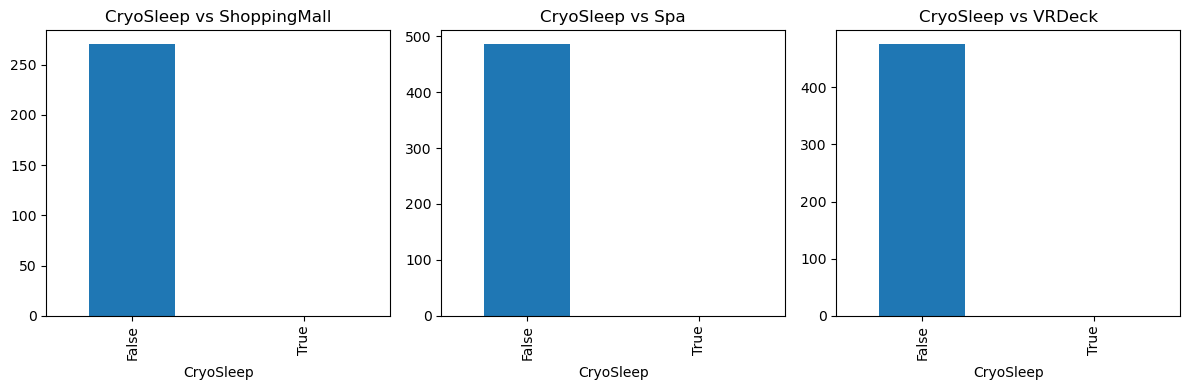

In [5]:
cryo_shop = train_data.groupby('CryoSleep')['ShoppingMall'].mean()
cryo_spa = train_data.groupby('CryoSleep')['Spa'].mean()
cryo_vr = train_data.groupby('CryoSleep')['VRDeck'].mean()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

cryo_shop.plot(kind='bar', ax=axes[0], title="CryoSleep vs ShoppingMall")
cryo_spa.plot(kind='bar', ax=axes[1], title="CryoSleep vs Spa")
cryo_vr.plot(kind='bar', ax=axes[2], title="CryoSleep vs VRDeck")

plt.tight_layout()
plt.show()


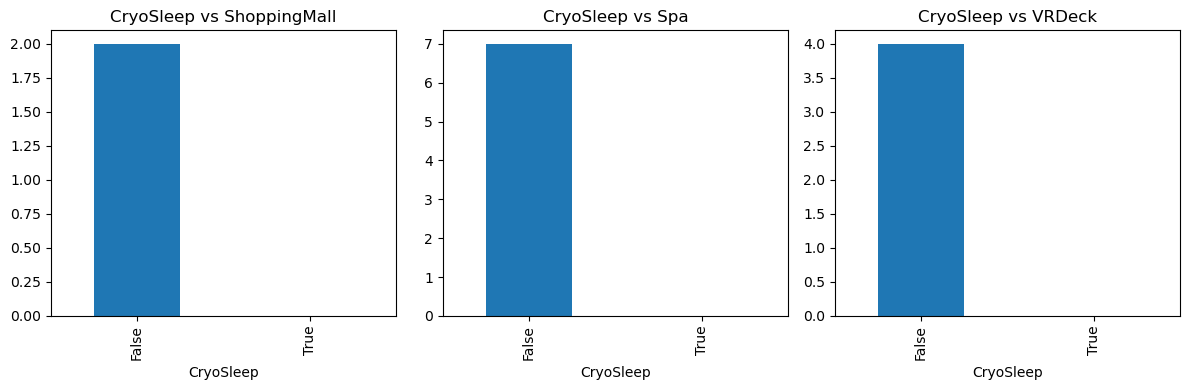

In [6]:
cryo_shop = train_data.groupby('CryoSleep')['ShoppingMall'].median()
cryo_spa = train_data.groupby('CryoSleep')['Spa'].median()
cryo_vr = train_data.groupby('CryoSleep')['VRDeck'].median()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

cryo_shop.plot(kind='bar', ax=axes[0], title="CryoSleep vs ShoppingMall")
cryo_spa.plot(kind='bar', ax=axes[1], title="CryoSleep vs Spa")
cryo_vr.plot(kind='bar', ax=axes[2], title="CryoSleep vs VRDeck")

plt.tight_layout()
plt.show()

In [7]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    train_data.loc[train_data['CryoSleep'] == True, col] = 0
    train_data[col] = train_data[col].fillna(train_data[col].median())

In [18]:
train_data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep       False
Cabin            True
Destination      True
Age              True
VIP              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
Transported     False
dtype: bool

In [9]:
spending_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

# If all spending columns are 0 and CryoSleep is missing → set to True
train_data.loc[
    train_data['CryoSleep'].isna() & (train_data[spending_cols].sum(axis=1) == 0),
    'CryoSleep'
] = True

# For remaining missing CryoSleep → fill with False (since they likely are awake)
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False)

C:\Users\gayat\AppData\Local\Temp\ipykernel_21876\4062494670.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False)


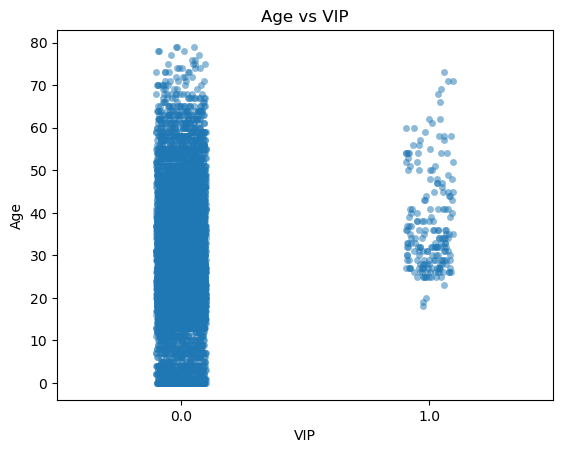

In [ ]:
train_data['VIP'] = train_data['VIP'].map({True:1, False:0})


sns.stripplot(x='VIP', y='Age', data=train_data, jitter=True, alpha=0.5)
plt.title("Age vs VIP")
plt.show()

In [19]:
check = train_data.groupby(['CryoSleep', 'VIP']).size()
print(check)

CryoSleep  VIP
False      0.0    5256
           1.0     178
True       0.0    3035
           1.0      21
dtype: int64


In [20]:
pd.crosstab(train_data['CryoSleep'], train_data['VIP'])

VIP,0.0,1.0
CryoSleep,,
False,5256,178
True,3035,21


In [24]:
train_data[train_data['Destination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
47,0045_02,Mars,True,F/10/P,NaN,19.0,0.0,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True
128,0138_02,Earth,False,E/5/P,NaN,34.0,0.0,0.0,22.0,0.0,564.0,207.0,Monah Gambs,False
139,0152_01,Earth,False,F/32/P,NaN,41.0,0.0,0.0,0.0,0.0,0.0,607.0,Andan Estron,False
347,0382_01,NaN,False,G/64/P,NaN,23.0,0.0,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False
430,0462_01,Earth,True,G/67/S,NaN,50.0,0.0,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,Earth,True,G/1453/P,NaN,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True
8551,9130_01,Mars,True,F/1765/S,NaN,41.0,0.0,0.0,0.0,0.0,0.0,0.0,Blers Corte,True
8616,9195_02,Mars,True,F/1779/S,NaN,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Ceros Purle,True
8621,9197_02,Europa,False,C/308/P,NaN,41.0,1.0,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False


In [25]:
train_data[train_data['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,0.0,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,0.0,0.0,0.0,0.0,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,0.0,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,0.0,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,0.0,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,0.0,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,0.0,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [27]:
missing_rows = pd.concat([
    train_data[train_data['HomePlanet'].isnull()],
    train_data[train_data['Destination'].isnull()]
]).drop_duplicates()
missing_rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,0.0,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,0.0,0.0,0.0,0.0,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,0.0,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,0.0,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,Earth,True,G/1453/P,NaN,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True
8551,9130_01,Mars,True,F/1765/S,NaN,41.0,0.0,0.0,0.0,0.0,0.0,0.0,Blers Corte,True
8616,9195_02,Mars,True,F/1779/S,NaN,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Ceros Purle,True
8621,9197_02,Europa,False,C/308/P,NaN,41.0,1.0,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False
